# Radfahrtypen & Profil Merkmale

In diesem Notebook beschäftigen wir uns vor allem mit den einzelnen Merkmalen die sich auf die Teilnehmer_innen unserer Umfrage beziehen.

Eines der Ziele dieses Projektes ist die Zuordnung der Teilnehmer_innen der Umfrage in verschiedene Radfahrtypen. Dies ermöglicht uns, unterschiedliches Antwortverhalten bei der Einschätzung des subjektiven Sicherheitsgefühls besser zu verstehen. Dafür nehmen wir vor allem Bezug auf die Arbeit von Francke, Anke, Lißner (2019). In ihrer Arbeit stellen sie eine Radfahrtypologie vor, mit welcher sie vorlieben für die Radverkehrsinfrastruktur beschreiben. Für die Zuordnung stellen Francke et al. einen Fragebogen vor, der die Basis für unsere Radfahrtyp-Zuordnung bildet. Dieser Fragebogen besteht aus 142 Items von verschiedenen Typen.

Ziel unserer Datenerhebung ist es, von allen Teilnehmer_innen ausreichend Daten zu erheben. Um dieses Ziel zu erreichen, wollen wir eine gute Nutzererfahrung (UX) bieten. Da es eine öffentliche Umfrage ist kann dadurch verhindert werden, dass Teilnehmer_innen vorzeitig die Umfrage abbrechen. Das Hauptinteresse der Datenerhebung liegt bei der Bewertung der Szenen mit unterschiedlicher Radverkehrsinfrastruktur. Deshalb muss der Fragebogen von Francke et al. auf das nötigste reduziert werden. Auch sollen die Items zugänglicher gestaltet sein, indem die Items kürzer formuliert werden. Änderungen an Fragebögen sorgen natürlich dafür, das die Ergebnisse nicht mehr vergleichbar sind (u. a. Schwarz, 1999 und Catania et al., 1996).

In der Arbeit von Francke et al. gibt es neben den Items zu den soziodemographischen Merkmalen noch Items aus 9 verschiedenen Kategorien. Um eine gute Unterscheidung der Radfahrtypen zu ermöglichen, nutzen wir die Itemkategorien, deren Mittelwerte die beste Unterscheidung ermöglichen. Dazu gehören folgende Itemkategorien:

- Wetter & Komfort
- Nutzungshäufigkeiten
- Durchschnittlich zurückgelegte Distanz
- Affektive Motive
- Instrumentelle Motive
- Subjektive Sicherheit

Diese Kategorien geben uns insgesamt 24 Items. Für eine gute UX ist das noch zu viel. Um die Auswahl weiter zu reduzieren, nehmen wir aus jede der Kategorien jeweils ein Item. Wir kennen die Verteilungen der Antworten für die einzelnen Items nicht, welche die beste Unterscheidung der Radfahrtypen gewährleisten. Deshalb nehmen wir die Items mit der größten Standardabweichung in den Itemkategorien. (TODO Außnahmen Instrumentelle Motive und durchschnittlich zurückgelegte Distanz!) Dadurch erhalten wir folgende Items:

1. Wie wichtig sind die folgenden Faktoren für Ihre generelle Entscheidung Rad zu fahren?
    - a. Spaß am Fahren
    - b. Flexibilität und Praktikabilität
2. Unter welchen Bedingungen fahren Sie seltener als üblicherweise oder gar nicht Fahrrad?
    - bei schlechtem Wetter (z.B. Kälte, Regen, Wind)
3. Wie sehr stimmen Sie den folgenden Aussagen zu?
    - Ich fühle mich sicher auf dem Fahrrad im Verkehr.
4. Wie lange dauert der Weg, den Sie am häufigsten mit dem Fahrrad zurücklegen (ohne Rückweg)?
5. Wie häufig nutzen Sie die folgenden Verkehrsmittel üblicherweise unter guten Witterungsbedingungen?
    - Fahrrad (auch Pedelec, E-Bike bis 25km/h)

Um die UX weiter zu optimieren, reduzieren wir die Anzahl der Worte auf einem einzelnen Bild. Durch diese Wortreduzierung kommt es zu einer umformulierung. Normalerweise müssen bei der Gestaltung von Items eine Validierung durch eine Vorerhebung stattfinden (beispielsweise in Münzer 2011), was für unsere Erhebung nicht möglich sein wird. Für die Einfachheit sind die Fragen 1-3 Likert Skalen mit 5 Optionen. Unsere Items für die Zuordnung der Radfahrtypen sind die folgenden:

- Ich fahre Fahrrad, weil es mir Spaß macht.
- Mit dem Fahrrad bin ich schneller und flexibler.
- Bei schlechtem Wetter fahre ich kein Fahrrad.
- Ich fühle mich sicher auf dem Fahrrad im Verkehr.
- Wie lange dauert der Weg, den Sie am häufigsten mit dem Fahrrad zurücklegen (ohne Rückweg)?
- Wie häufig nutzen Sie diese Verkehrsmittel?

## Bestimmung der Radfahrtypen

Um die Radfahrtypen zu bestimmen, müssen wir uns nun die Werte aus den Items anschauen. Zudem interessiert uns wie in der Arbeit von Francke et al. die Summe der Werte aus all diesen Items.

In [1]:
# import packages
from src.visualization.visualize import likert_plot
from src.data import load_full_data, load_profiles

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data
data_df = load_full_data()
profile_df = load_profiles()

In [3]:
# get dataframe with all our features
biker_class_features = ["motivationalFactors_faster",
                        "motivationalFactors_weather",
                        "transportRatings_bicycle",
                        "bicycleUse",
                        "motivationalFactors_safe",
                        "motivationalFactors_bikefun"]
class_df = profile_df[(profile_df["userGroup"] == "potentialBicycle") | (profile_df["userGroup"] == "bicycle")]
class_df = class_df[biker_class_features]
class_df["sum_all_factors"] = class_df.sum(axis=1)
class_df = class_df.dropna()

Wenn sich Radfahrtypen in Gruppen in ihrem Antwortverhalten unterscheiden, kann dies manchmal in der Verteilung der Werte erkannt werden.

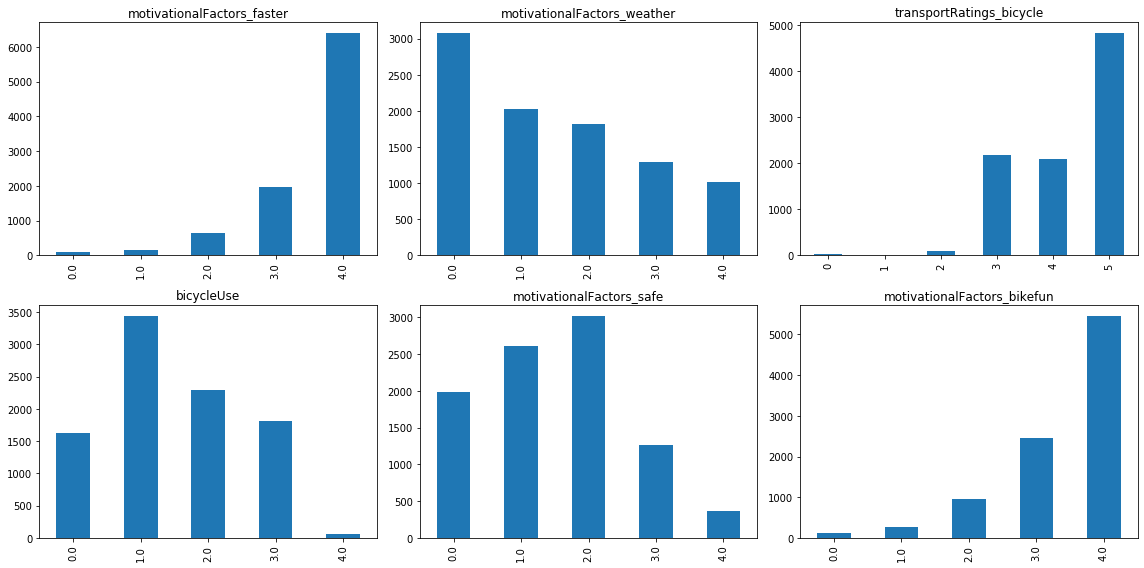

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()
for i, col in enumerate(class_df.columns[:-1]):
    class_df[col].value_counts().sort_index().plot(kind="bar", ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()

Bei der Frage zur Nutzungshäufigkeit wurde entschieden ob die restlichen Motivationsfragen gestellt werden. Deshalb ist nicht die gesamte Bandbreite der Nutzungshäufigkeit im Datensatz vertreten. Dadurch entsteht natürlich die Gefahr, dass durch die Vorauswahl nicht mehr alle Radfahrtypen unter den Teilnehmer_innen vertreten sind.
Bei den restlichen Verteilungen kann keine Auffälligkeit festgestellt werden.

Nun betrachten wir die Verteilung der Summe der Itemwerte

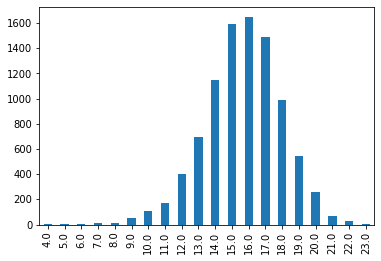

In [5]:
class_df["sum_all_factors"].value_counts().sort_index().plot(kind="bar")

Hier ist eine saubere Normalverteilung zu erkennnen, weshalb es in diesem Merkmal schwierig sein wird eine Unterscheidung fest zu stellen.

### Clustering

Wie auch in Francke et al. werden wir durch eine Clusteranalyse versuchen Häufungen in den Merkmalsausprägungen zu finden, um Radfahrtypen zu klassifizieren. In der Arbeit von Francke et al. werden die gleichen Radfahrtypen durch Anwendung mehrerer Clusterlösungen bestimmt, die optimale Methode war jedoch am Ende die Ward Methode.

#### Ward Methode


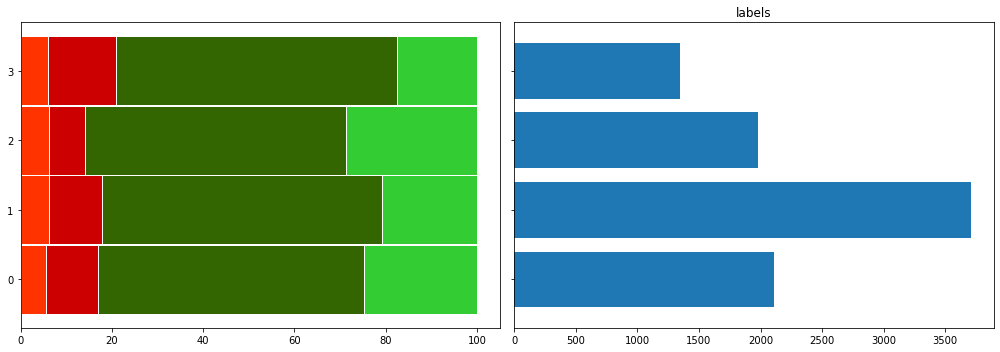

In [6]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import scale

class_df_scaled = scale(class_df)

clusters = AgglomerativeClustering(linkage="ward", n_clusters=4).fit(class_df_scaled)
class_df["labels"] = clusters.labels_
class_df_ratings = class_df.merge(data_df[["rating", "sessionID"]].groupby(["sessionID"]).median(), on="sessionID")
likert_plot(class_df_ratings[["labels", "rating"]])

Die gefundenen Cluster unterscheiden sich in der Bewertung der Szenen. Die Mittelwerte als maß für typische Itemausprägungen der Cluster sieht wie folgt aus.

In [7]:
class_df.groupby(["labels"]).mean()

,motivationalFactors_faster,motivationalFactors_weather,transportRatings_bicycle,bicycleUse,motivationalFactors_safe,motivationalFactors_bikefun,sum_all_factors
labels,,,,,,,
0,3.115566,2.484906,3.257075,1.171698,1.477358,3.398585,14.905189
1,3.781993,0.837029,4.814854,1.459792,1.267700,3.625167,15.786535
2,3.717987,1.505730,4.435974,2.317389,2.390135,3.855506,18.222720
3,3.415508,1.609364,3.962692,0.806145,0.903438,2.068764,12.765911


Diese Radfahrtypen unterscheiden sich in der Ausprägung der Merkmalen im Vergleich zu Francke et al.. Dies ist nicht verwunderlich, da die Items verändert wurden. Neben den Eigenschaften der Cluster sind auch die Verteilungen der anderen Profilmerkmale von Interesse.

In [9]:
profile_df_label = profile_df.reset_index().merge(class_df.reset_index()[["labels", "sessionID"]], on="sessionID")

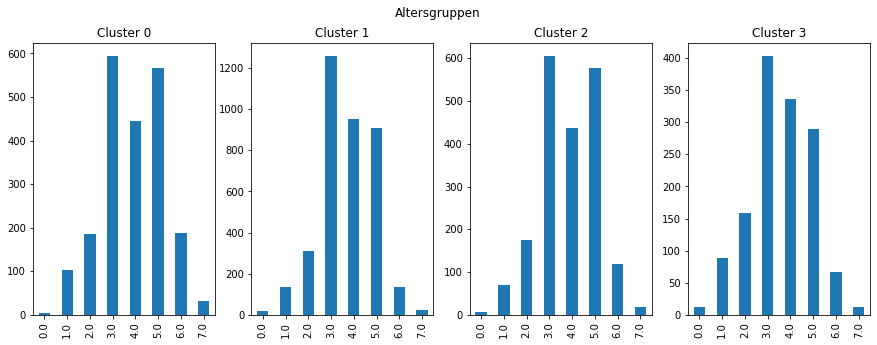

In [10]:
fig, axes = plt.subplots(1,4, figsize=(15,5))
axes = axes.flatten()
for x in range(4):
    fig.suptitle("Altersgruppen")
    profile_df_label[
        profile_df_label["labels"].eq(x)]["ageGroup"].value_counts().sort_index().plot(kind="bar",
                                                                                       ax=axes[x],
                                                                                       title="Cluster " + str(x))

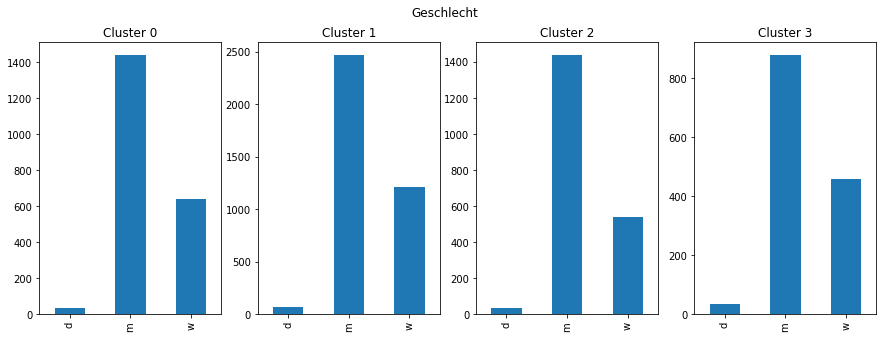

In [11]:
fig, axes = plt.subplots(1,4, figsize=(15,5))
axes = axes.flatten()
for x in range(4):
    fig.suptitle("Geschlecht")
    profile_df_label[
        profile_df_label["labels"].eq(x)]["gender"].value_counts().sort_index().plot(kind="bar",
                                                                                     ax=axes[x],
                                                                                     title="Cluster "+str(x))

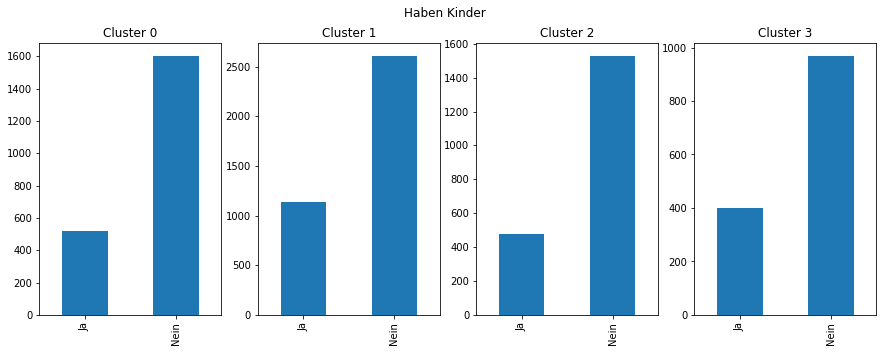

In [12]:
fig, axes = plt.subplots(1,4, figsize=(15,5))
axes = axes.flatten()
profile_df_label["hasChildren"] = profile_df_label["hasChildren"].replace({0.0: "Nein", 1.0: "Ja"})
for x in range(4):
    fig.suptitle("Haben Kinder")
    profile_df_label[
        profile_df_label["labels"].eq(x)]["hasChildren"].value_counts().sort_index().plot(kind="bar",
                                                                                          ax=axes[x],
                                                                                          title="Cluster " + str(x))

### Literatur:

- Francke, A., Anke, J., Schaefer, L. M., & Lißner, S. (2019). What kind of cyclist are you? Results of a survey-based typology of cyclists in Germany. Transportation research procedia, 41.
- Schwarz, N. (1999). Self-reports: how the questions shape the answers. American psychologist, 54(2), 93.
- Catania, J. A., Binson, D., Canchola, J., Pollack, L. M., Hauck, W., & Coates, T. J. (1996). Effects of interviewer gender, interviewer choice, and item wording on responses to questions concerning sexual behavior. Public Opinion Quarterly, 60(3), 345-375.
- Münzer, S., & Hölscher, C. (2011). Entwicklung und Validierung eines Fragebogens zu räumlichen Strategien. Diagnostica.
